In [1]:
%matplotlib inline

In [2]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from moscot.problems.time import TemporalProblem
import moscot as msc
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=400)
                         
import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

2023-01-30 17:09:03.675737: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-30 17:09:13.426379: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-30 17:09:14.601839: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-30 17:09:26.288167: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or dire

['default', 'despine']


In [3]:
color_dict = { 'Prlf. Ductal': '#f7b6d2', 'Ductal': '#d62728', 'Imm. Acinar': '#ffeb3b', 'Mat. Acinar': '#98df8a',
    'Alpha': '#1f77b4', 'Beta': '#ff7f0e', 'Delta': '#279e68', 'Eps. progenitors': '#aa40fc', 'Epsilon': '#8c564b',
       'Fev+': '#e377c2', 'Fev+ Alpha': '#b5bd61', 'Fev+ Beta': '#42f5ec', 'Fev+ Delta': '#aec7e8', 'Fev+ Delta,0': '#17becf', 'Fev+ Delta,1':'#98df8a',
    'Ngn3 high cycling': '#adf542',
        'Ngn3 high,0': '#ff9896', 'Ngn3 high': '#ff9896', 'Ngn3 high,1':'#f0b98d', 'Ngn3 low': '#c5b0d5'
}

In [4]:
output_dir = "/lustre/groups/ml01/workspace/moscot_paper/pancreas/diffusion_plots/"

In [5]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_multiome_2022_processed.h5ad")

In [6]:
adata_2 = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/embeddings/pancreas_shared_embeddings.h5ad")

In [7]:
adata.obsm["X_multi_vi"] = adata_2.obsm["X_multi_vi"]

In [8]:
new_annotation = pd.read_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas/EDA/endocrine_refinement.csv")

In [9]:
adata.obs["Fev_delta_refinement"] = new_annotation["Fev_delta_refinement"].values
adata.obs["Ngn3_high_refinement"] = new_annotation["Ngn3_high_refinement"].values
adata.obs["refinement"] = new_annotation["refinement"].values

In [10]:
endocrine_celltypes = [
    "Ngn3 high,1",
    "Fev+ Delta,0",
    "Fev+ Delta,1",
    "Eps. progenitors",
    "Delta",
    "Epsilon",
    "Alpha"
]

In [11]:
adata = adata[adata.obs["refinement"].isin(endocrine_celltypes)].copy()

In [12]:
adata.obs["refinement"]  = adata.obs["refinement"].astype("category")

In [13]:
adata.uns["refinement_colors"] = [color_dict[ct] for ct in adata.obs["refinement"].cat.categories]

In [14]:
adata.uns["celltype_colors"] = [color_dict[ct] for ct in adata.obs["celltype"].cat.categories]

In [15]:
sc.pp.neighbors(adata, use_rep="X_pca_wsnn")

In [16]:
sc.tl.diffmap(adata, n_comps=5)

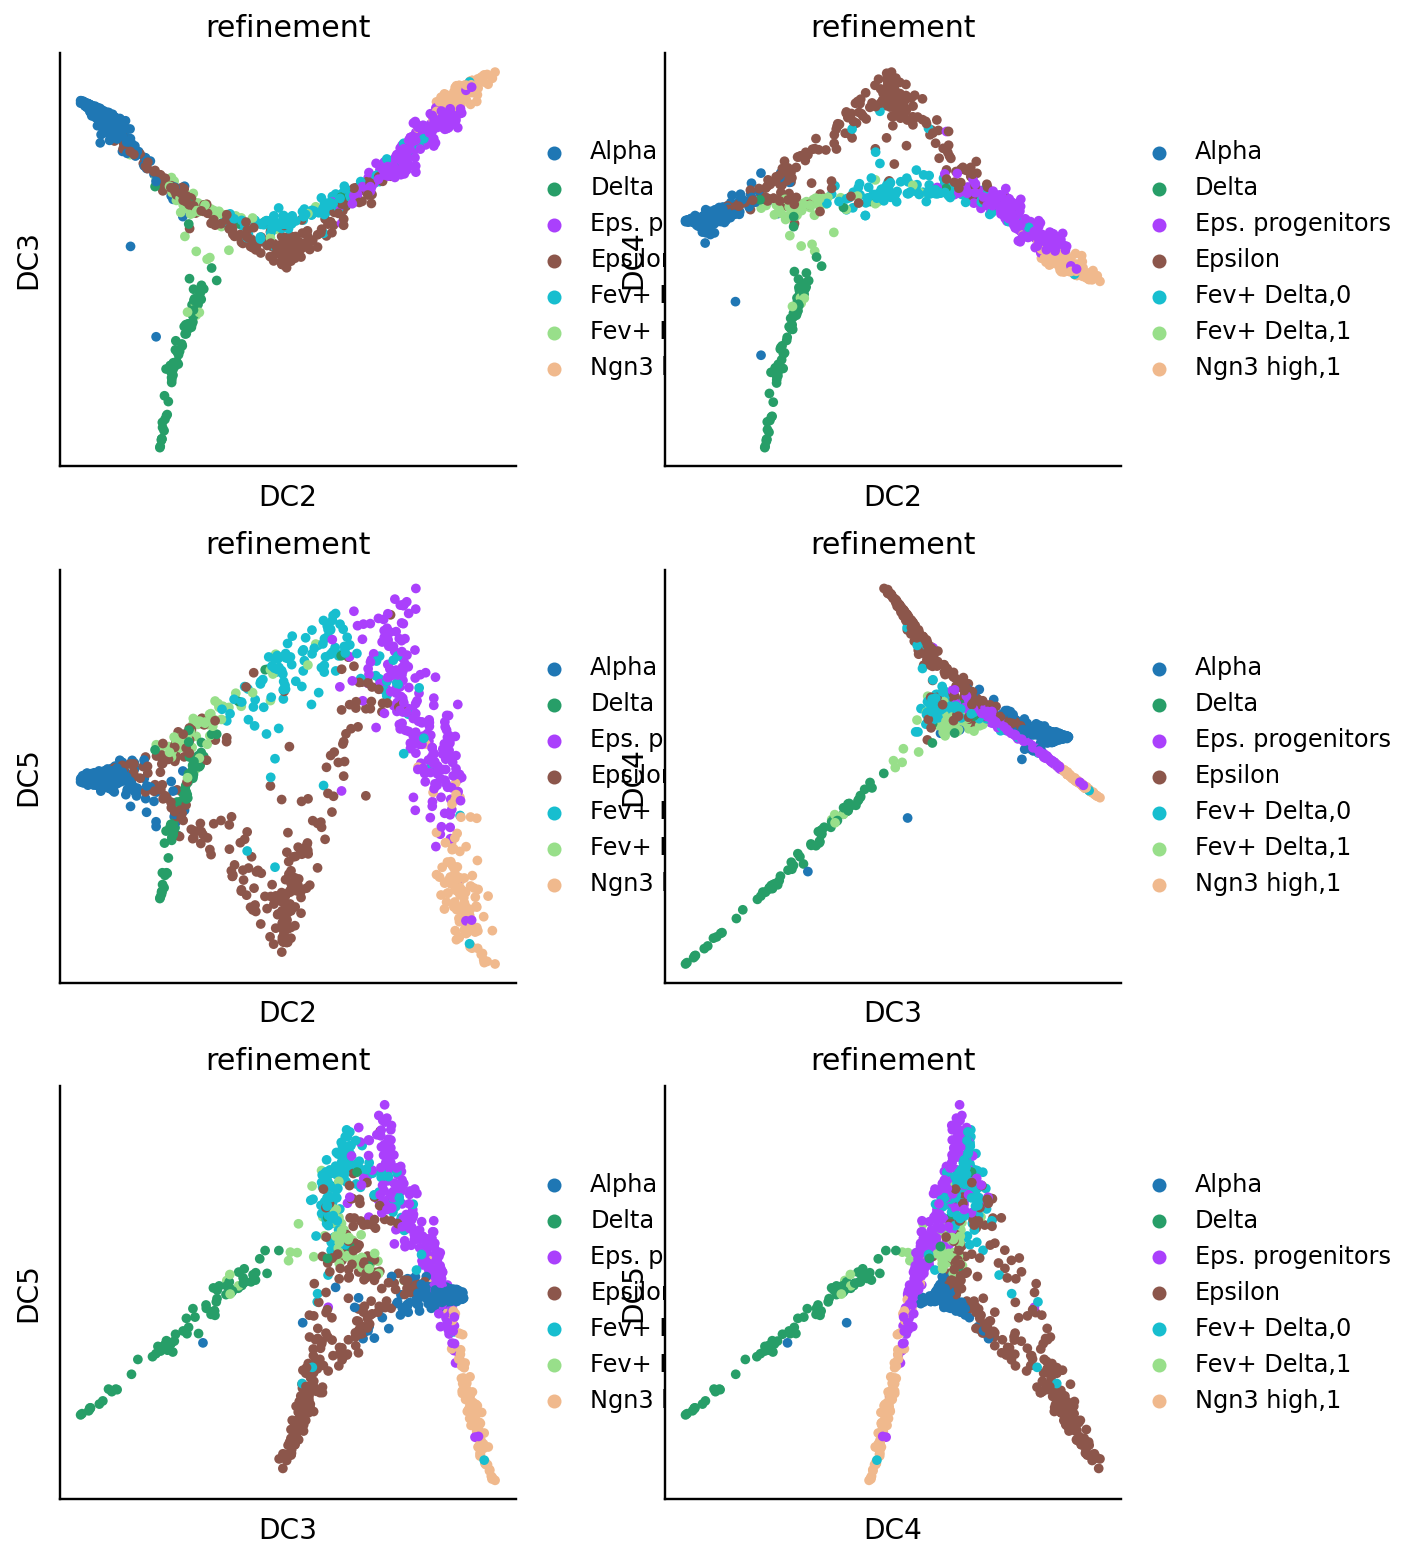

In [17]:
sc.pl.diffmap(adata, color="refinement", components=['2,3', "2,4", '2,5', "3,4", "3,5", "4,5"], ncols=2)

In [18]:
tp0 = TemporalProblem.load("/lustre/groups/ml01/workspace/moscot_paper/pancreas/TemporalProblem.pkl")

In [19]:
tp0.pull(14.5, 15.5, data="celltype", subset="Delta", key_added="Delta_pull")

In [20]:
tp0.pull(14.5, 15.5, data="celltype", subset="Alpha", key_added="Alpha_pull")

In [21]:
tp0.pull(14.5, 15.5, data="celltype", subset="Epsilon", key_added="Epsilon_pull")

In [22]:
tp0.pull(14.5, 15.5, data="celltype", subset="Fev+ Delta", key_added="Fev_delta_pull")

In [23]:
tp0.pull(14.5, 15.5, data="refinement", subset="Fev+ Delta,0", key_added="Fev_delta0_pull")

In [24]:
tp0.pull(14.5, 15.5, data="refinement", subset="Fev+ Delta,1", key_added="Fev_delta1_pull")

In [25]:
tp0.pull(14.5, 15.5, data="refinement", subset="Eps. progenitors", key_added="Eps_prog_pull")

In [26]:
tp0.push(14.5, 15.5, data="celltype", subset="Fev+ Delta", key_added="Fev_delta_push")

In [27]:
tp0.push(14.5, 15.5, data="refinement", subset="Fev+ Delta,0", key_added="Fev_delta0_push")

In [28]:
tp0.push(14.5, 15.5, data="refinement", subset="Fev+ Delta,1", key_added="Fev_delta1_push")

In [29]:
tp0.push(14.5, 15.5, data="refinement", subset="Ngn3 high,1", key_added="Ngn3_1_push")

In [30]:
tp0.push(14.5, 15.5, data="refinement", subset="Eps. progenitors", key_added="Eps_prog_push")

In [31]:
tp0.push(14.5, 15.5, data="celltype", subset="Epsilon", key_added="Epsilon_push")

In [32]:
tp0.push(14.5, 15.5, data="refinement", subset="Ngn3 high,1", key_added="Ngn3_high_push")

In [33]:
tp0._adata = tp0.adata[tp0.adata.obs["refinement"].isin(endocrine_celltypes)]

In [34]:
tp0.adata.obsm["diff_map"] = adata.obsm["X_diffmap"][:, [1,4]]
tp0.adata.obsm["diff_map"][:,0] = -tp0.adata.obsm["diff_map"][:,0]
tp0.adata.obsm["diff_map"][:,1] = -tp0.adata.obsm["diff_map"][:,1]

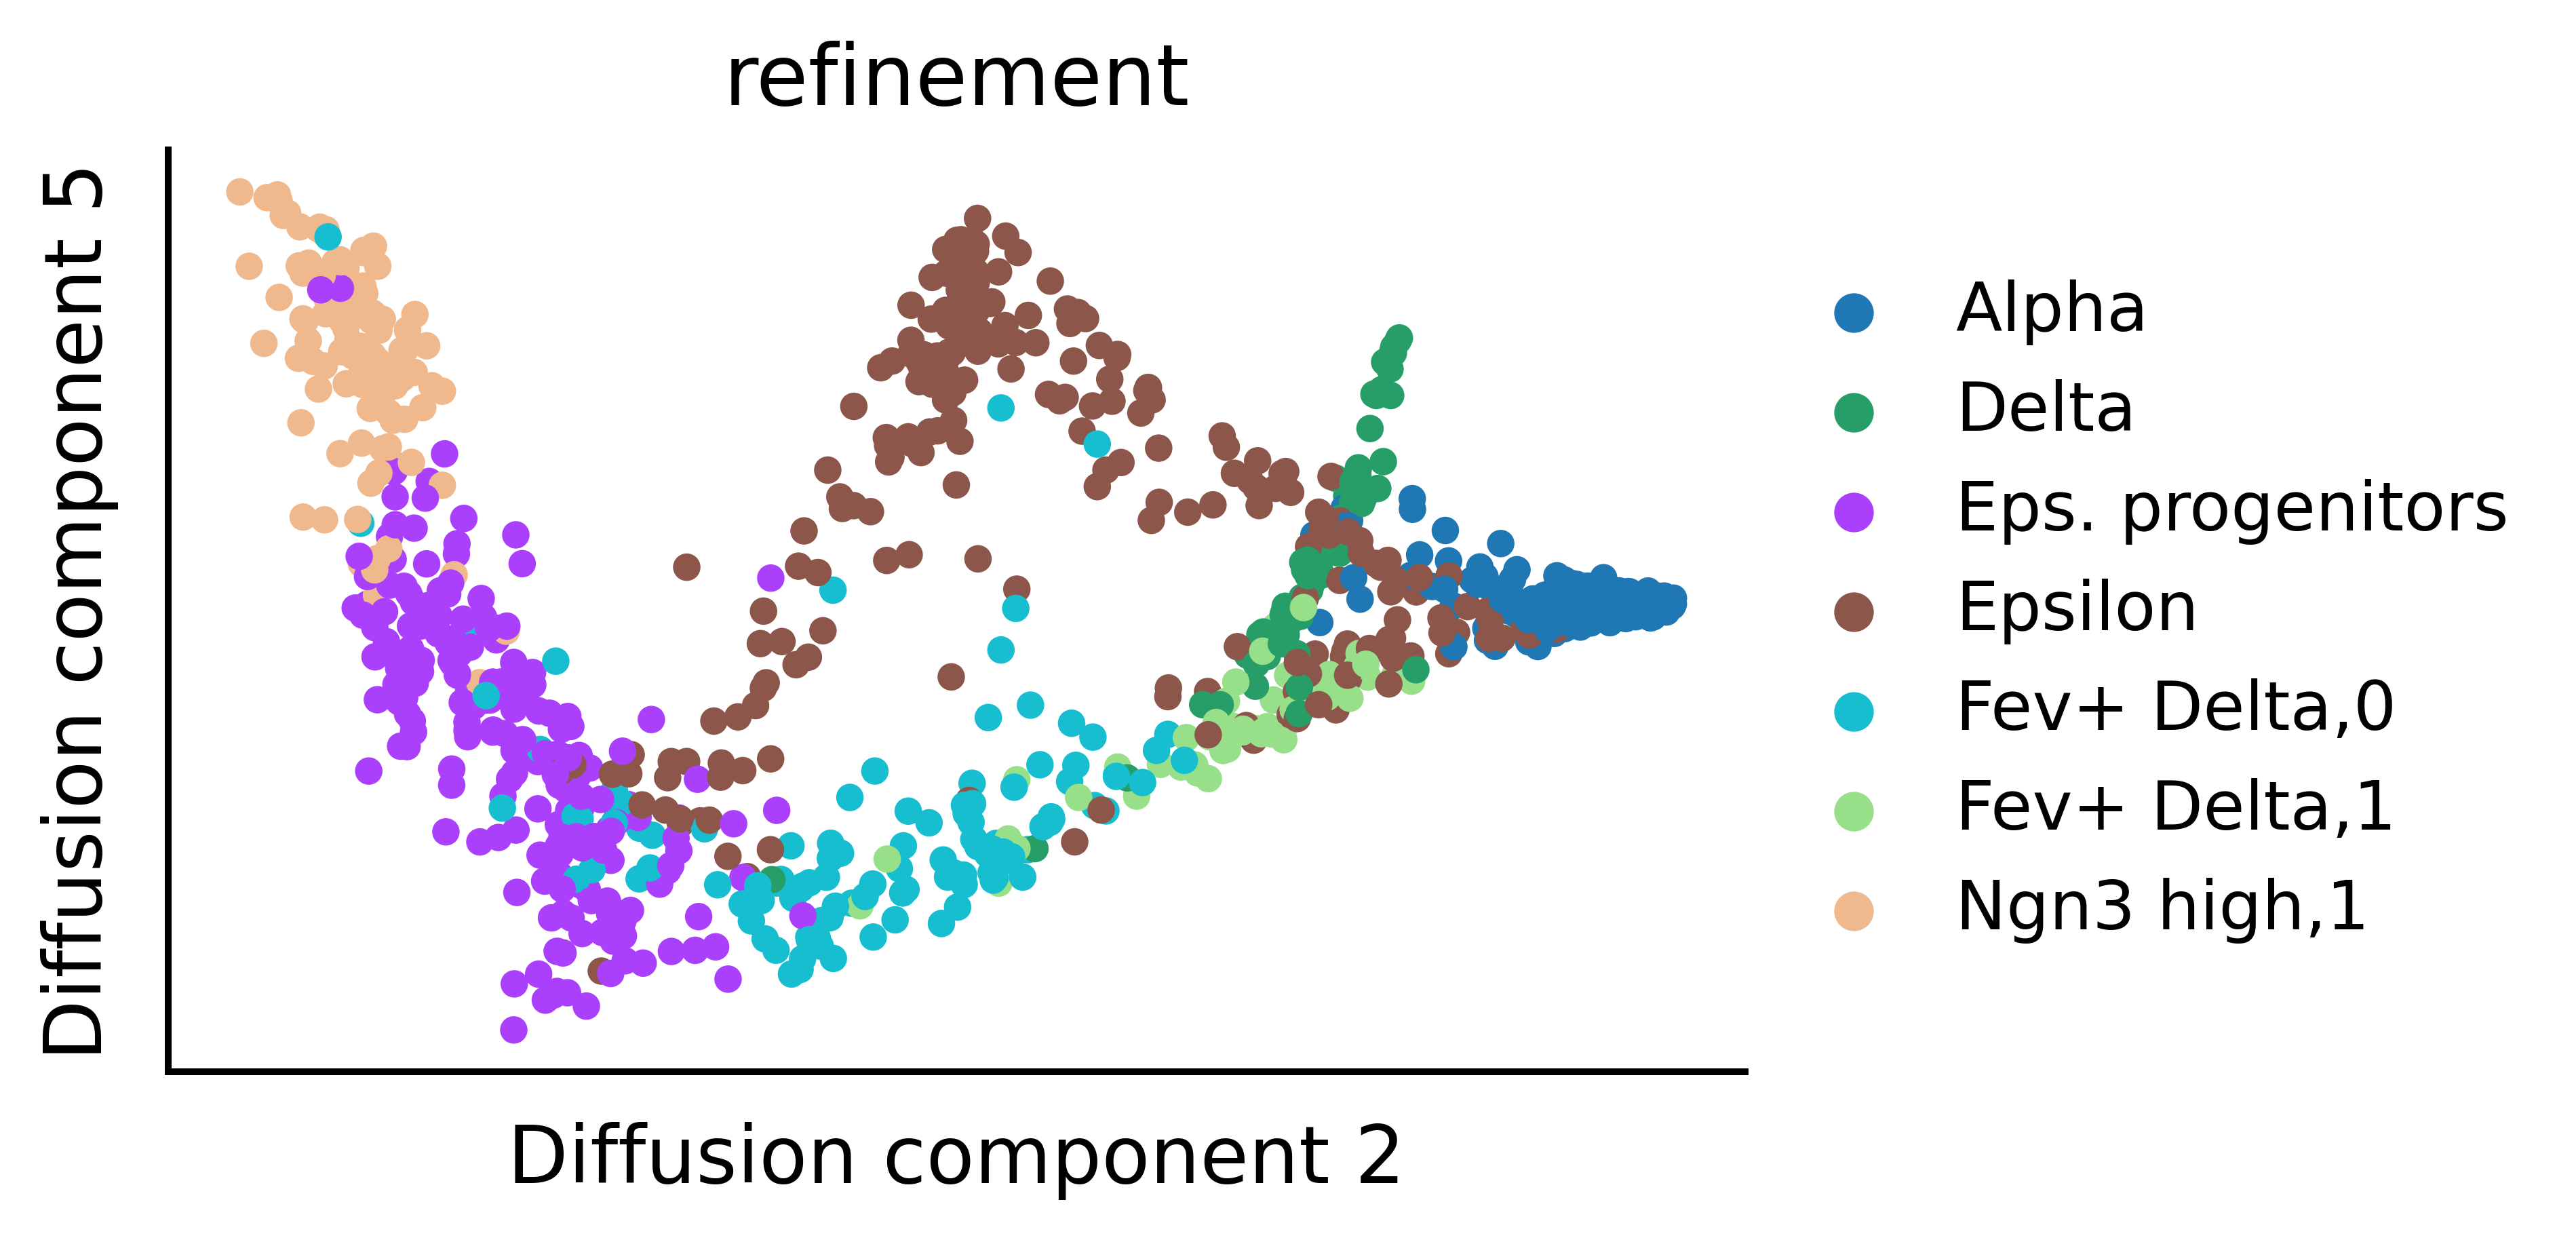

In [35]:
with plt.rc_context({"figure.figsize": (5, 3), "figure.dpi": (300)}):
    axes = sc.pl.embedding(tp0.adata, basis="diff_map", color="refinement", show=False)
    axes.set_xlabel("Diffusion component 2")
    axes.set_ylabel("Diffusion component 5")

In [36]:
axes.figure.savefig(os.path.join(output_dir, 'diffusion_refinement.png'))

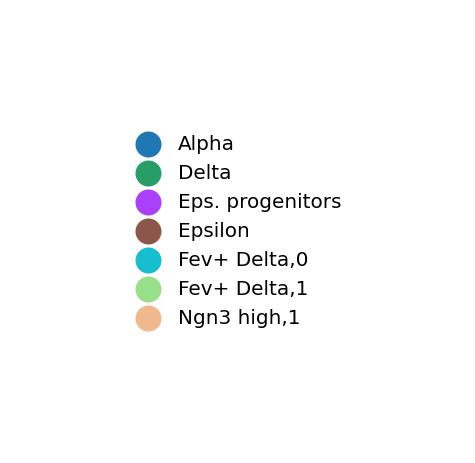

In [37]:
label_params = axes.get_legend_handles_labels() 
figl, axl = plt.subplots()
axl.axis(False)
axl.legend(*label_params, fontsize=5, loc="center", markerscale=2, bbox_to_anchor=(0.5, 0.5), prop={"size":10})

In [38]:
axl.figure.savefig(os.path.join(output_dir, 'diffusion_refinement_legend_only.png'))

In [39]:
tp0.adata.uns["celltype_colors"] = [color_dict[ct] for ct in adata.obs["celltype"].cat.categories]

# Visualize pull

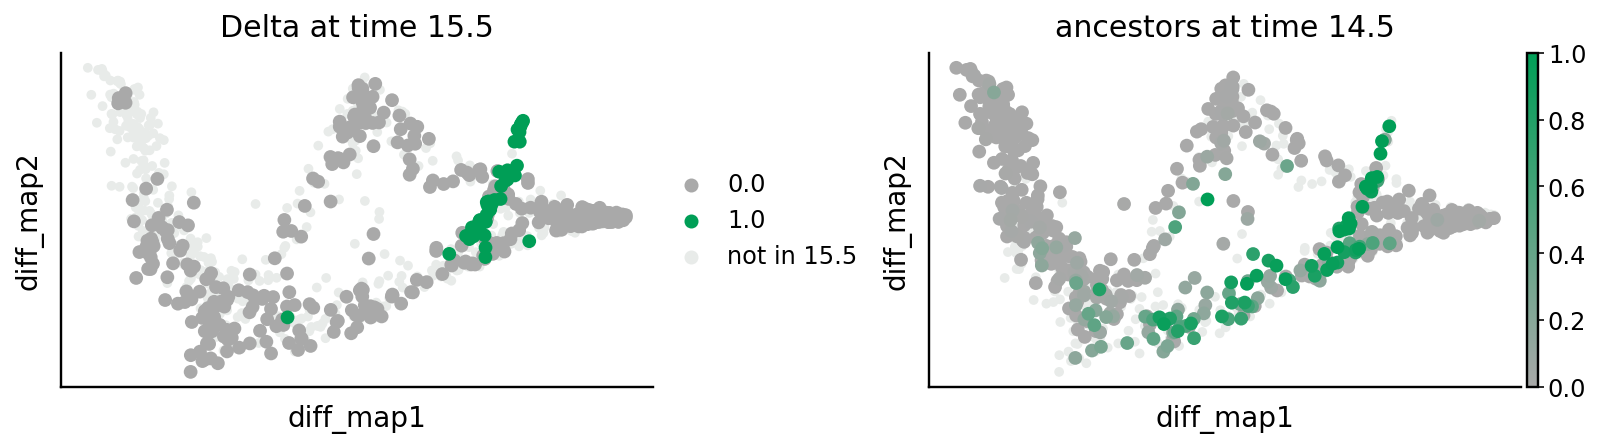

In [40]:
msc.plotting.pull(tp0, uns_key="Delta_pull", basis="diff_map", time_points=[14.5, 15.5], figsize=(11,3), save=os.path.join(output_dir, "Delta_pull"))

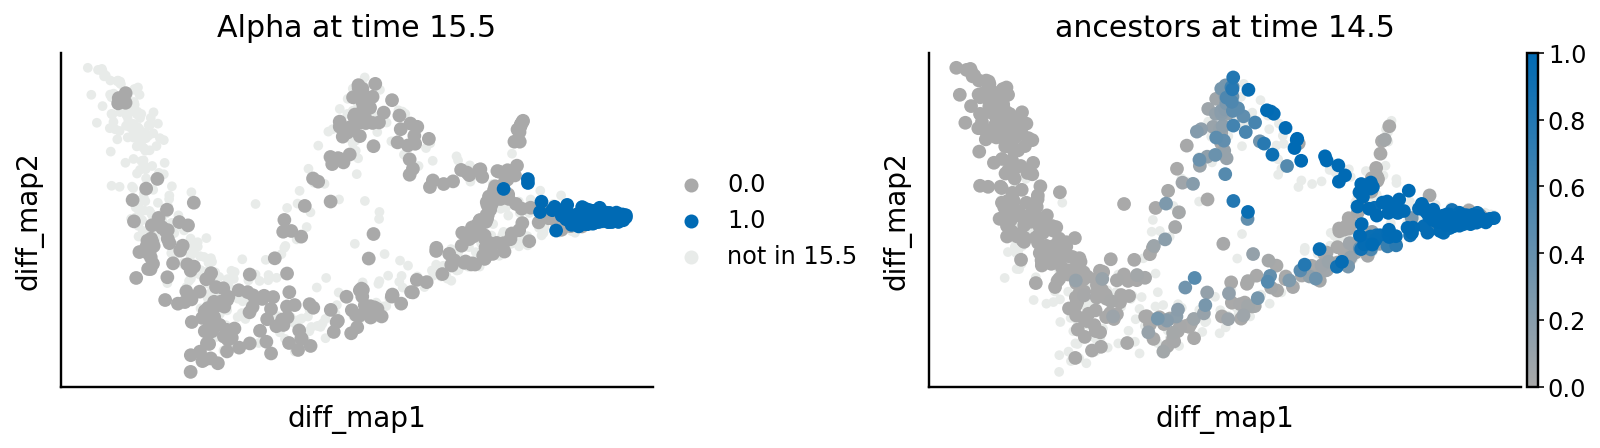

In [41]:
msc.plotting.pull(tp0, uns_key="Alpha_pull", basis="diff_map", time_points=[14.5, 15.5], figsize=(11,3), save=os.path.join(output_dir, "Alpha_pull"))

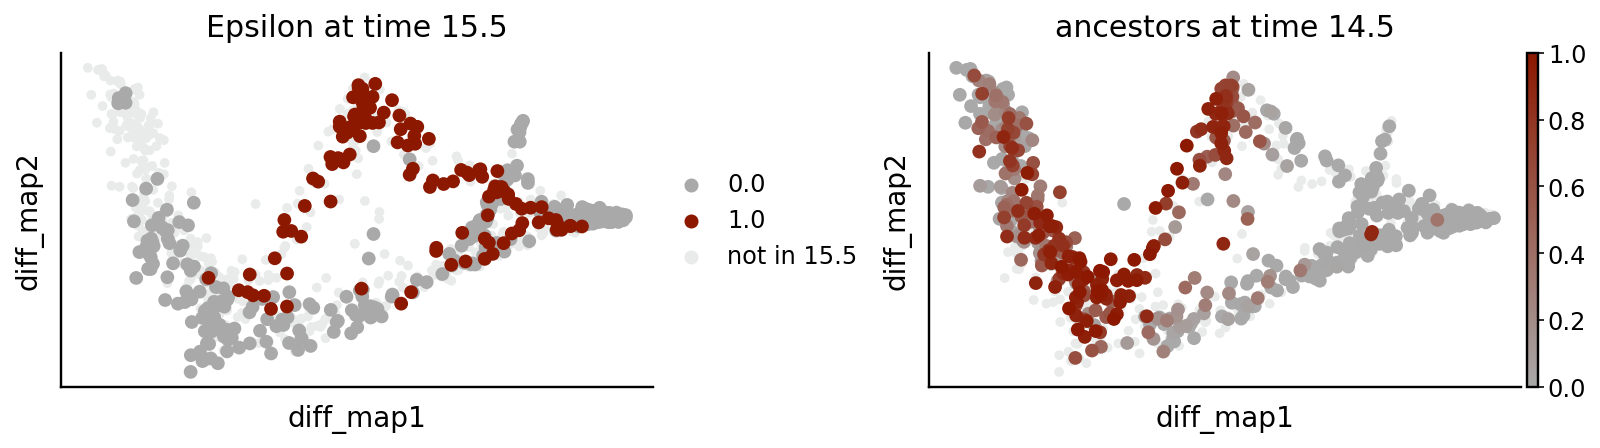

In [42]:
msc.plotting.pull(tp0, uns_key="Epsilon_pull", basis="diff_map", time_points=[14.5, 15.5], figsize=(11,3), save=os.path.join(output_dir, "Epsilon_pull"))

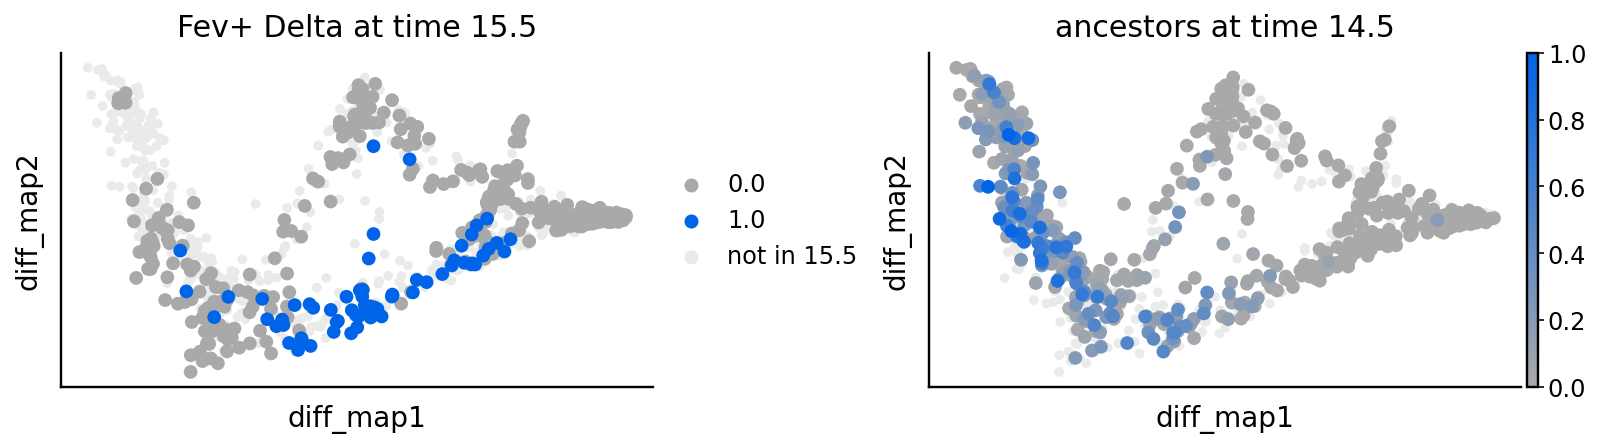

In [43]:
msc.plotting.pull(tp0, uns_key="Fev_delta_pull", basis="diff_map", time_points=[14.5, 15.5], figsize=(11,3), save=os.path.join(output_dir, "Fev_delta_pull"))

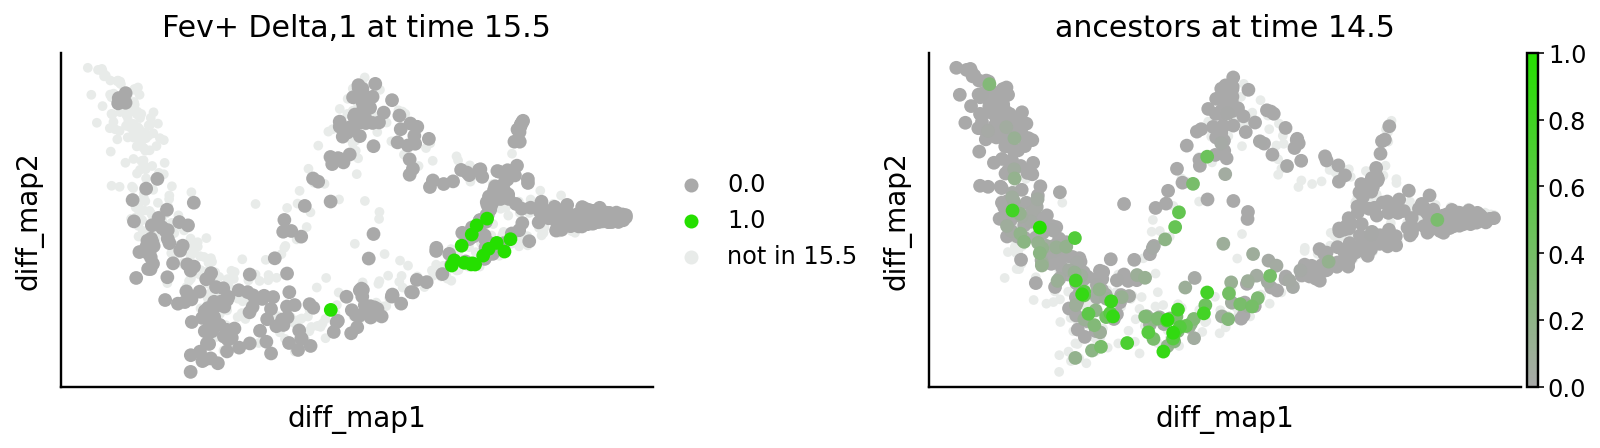

In [44]:
msc.plotting.pull(tp0, uns_key="Fev_delta1_pull", basis="diff_map", time_points=[14.5, 15.5], figsize=(11,3), save=os.path.join(output_dir, "Fev_Delta1_pull"))

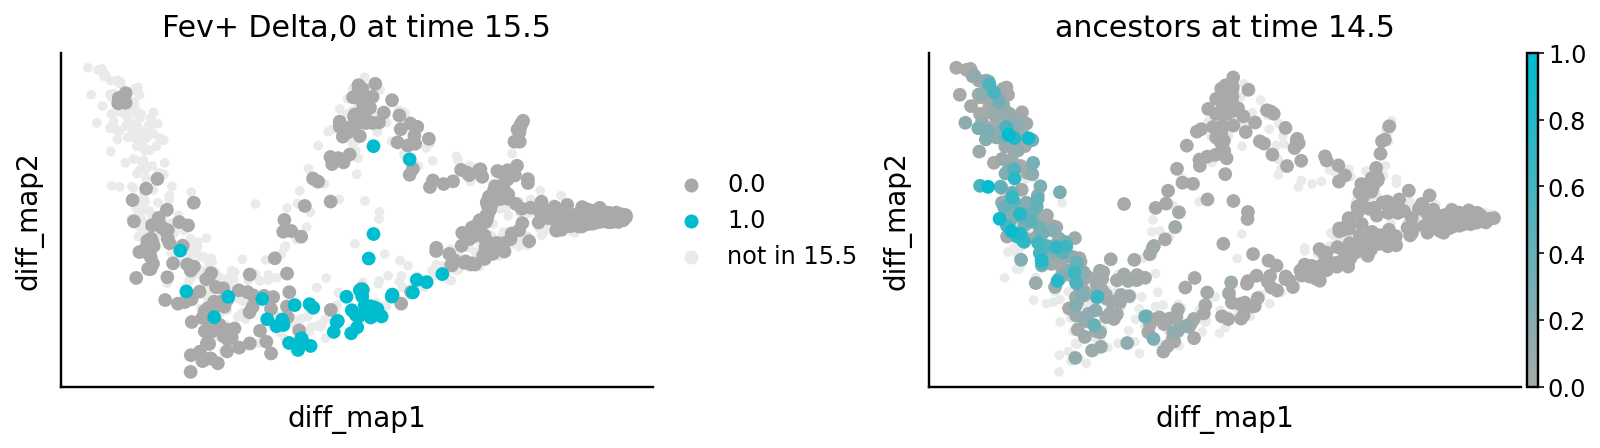

In [45]:
msc.plotting.pull(tp0, uns_key="Fev_delta0_pull", basis="diff_map", time_points=[14.5, 15.5], figsize=(11,3), save=os.path.join(output_dir, "Fev_Delta0_pull"))

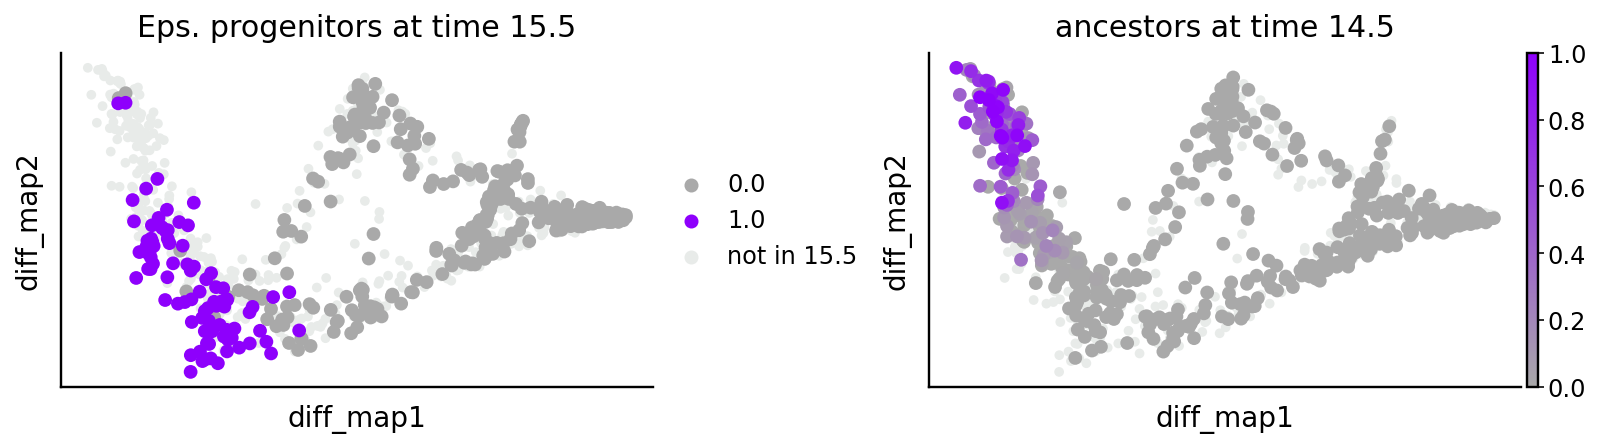

In [46]:
msc.plotting.pull(tp0, uns_key="Eps_prog_pull", basis="diff_map", time_points=[14.5, 15.5], figsize=(11,3), save=os.path.join(output_dir, "Eps_prog_pull"))

# Push

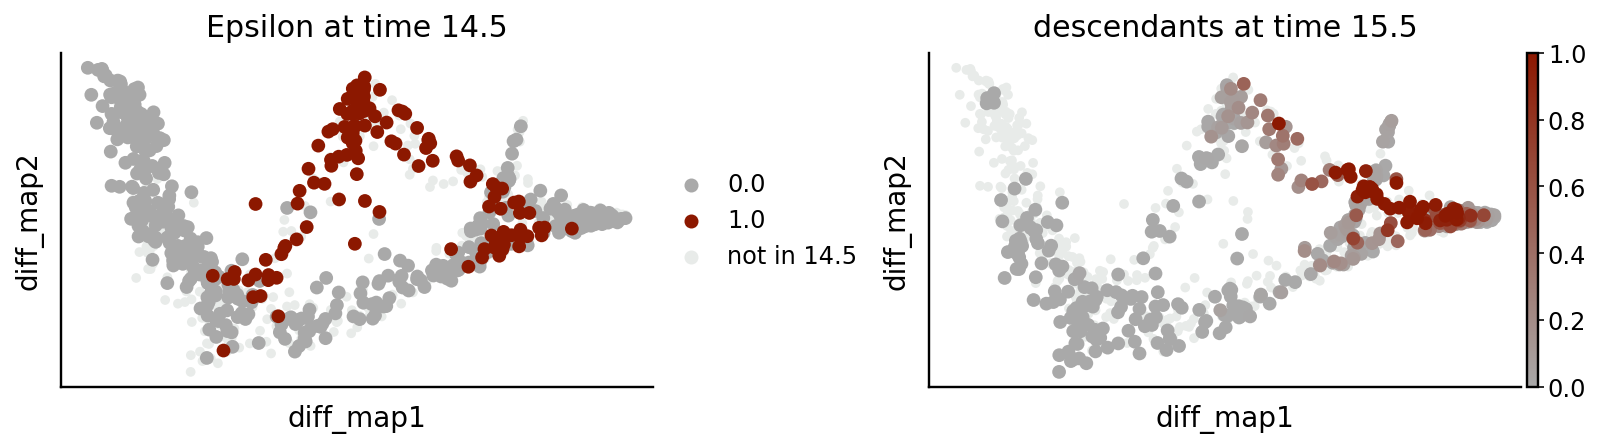

In [47]:
msc.plotting.push(tp0, uns_key="Epsilon_push", basis="diff_map", time_points=[14.5, 15.5], figsize=(11,3), save=os.path.join(output_dir, "Epsilon_push"))

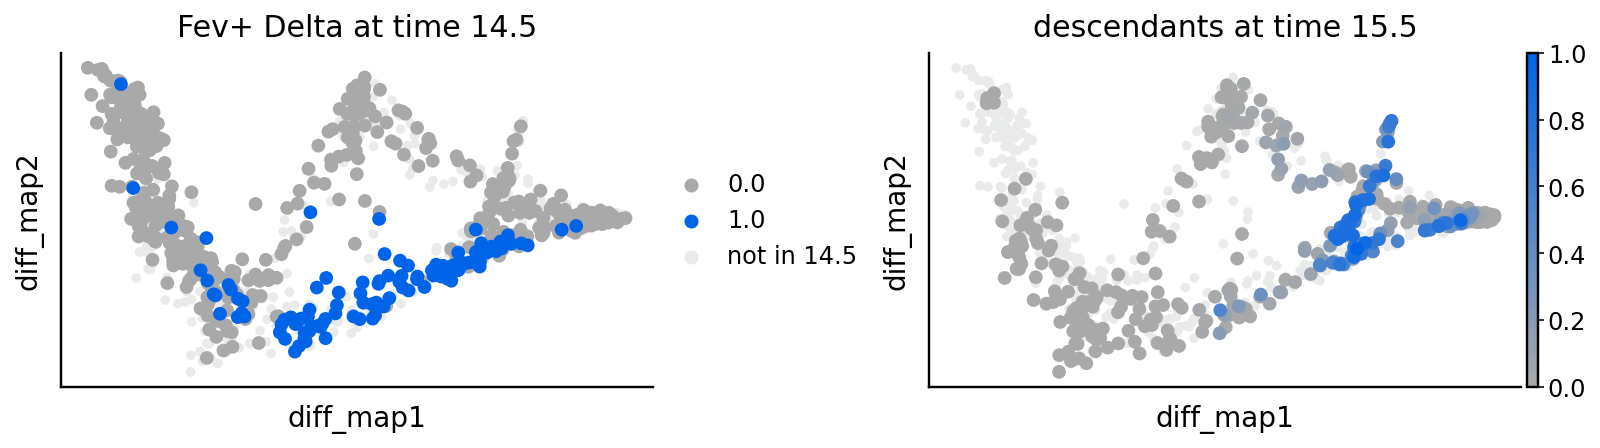

In [48]:
msc.plotting.push(tp0, uns_key="Fev_delta_push", basis="diff_map", time_points=[14.5, 15.5], figsize=(11,3), save=os.path.join(output_dir, "Fev_Delta_push"))

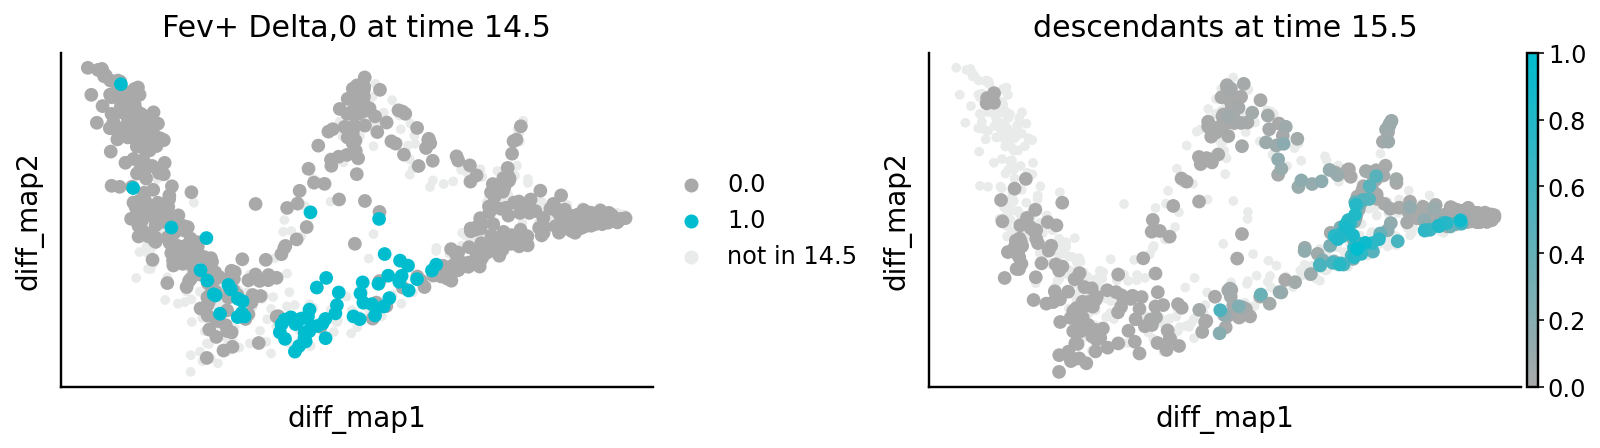

In [49]:
msc.plotting.push(tp0, uns_key="Fev_delta0_push", basis="diff_map", time_points=[14.5, 15.5], figsize=(11,3), save=os.path.join(output_dir, "Fev_Delta0_push"))

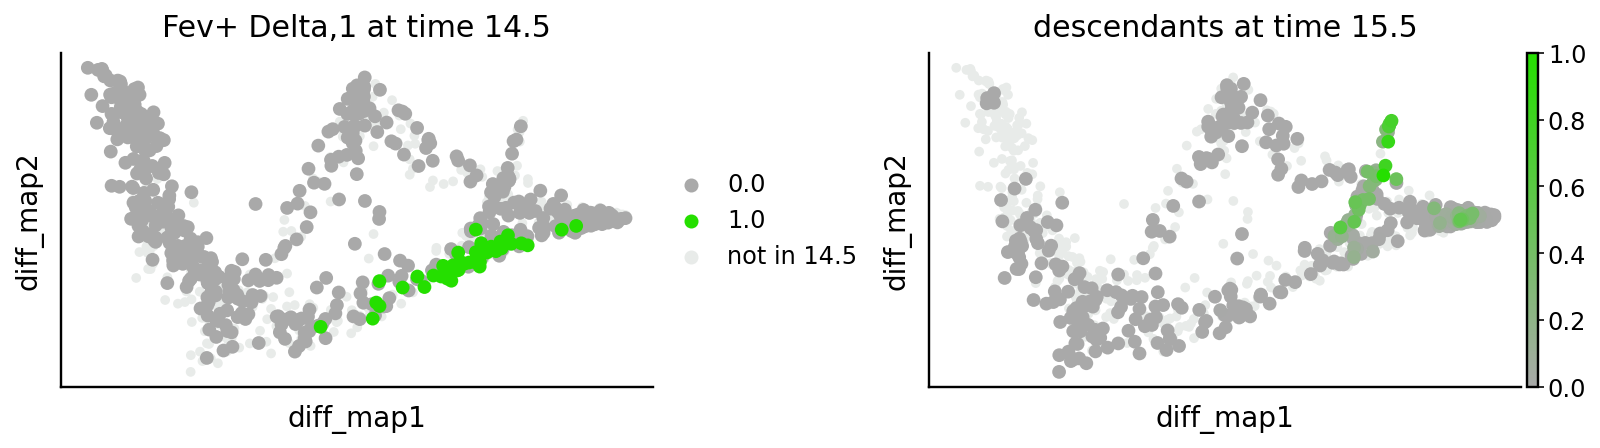

In [50]:
msc.plotting.push(tp0, uns_key="Fev_delta1_push", basis="diff_map", time_points=[14.5, 15.5], figsize=(11,3), save=os.path.join(output_dir, "Fev_Delta1_push"))

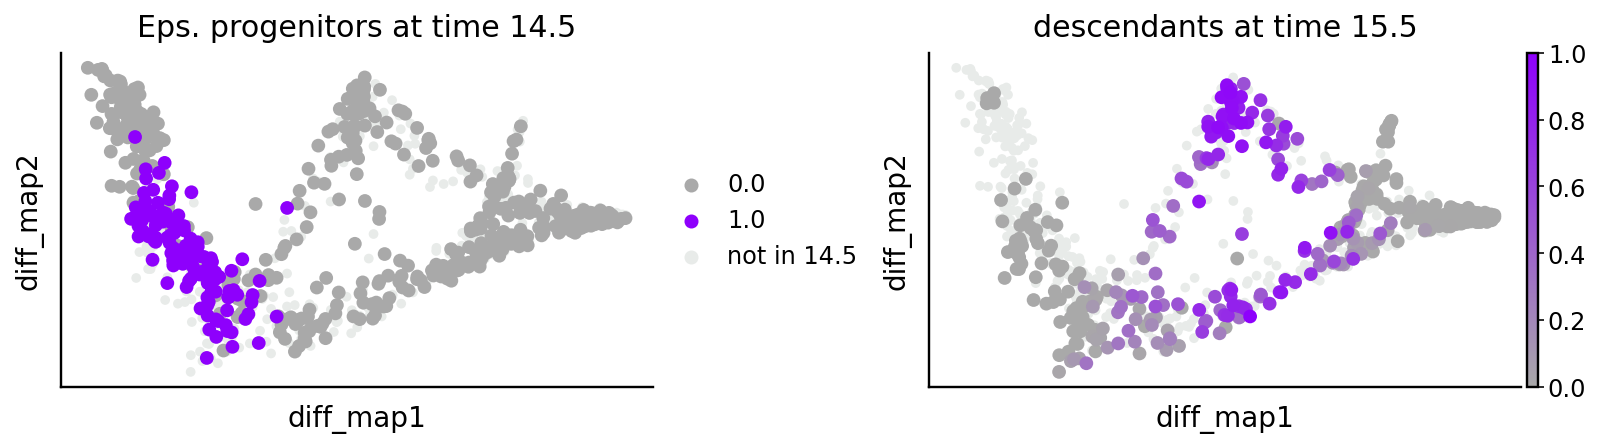

In [51]:
msc.plotting.push(tp0, uns_key="Eps_prog_push", basis="diff_map", time_points=[14.5, 15.5], figsize=(11,3), save=os.path.join(output_dir, "Eps_prog_push"))

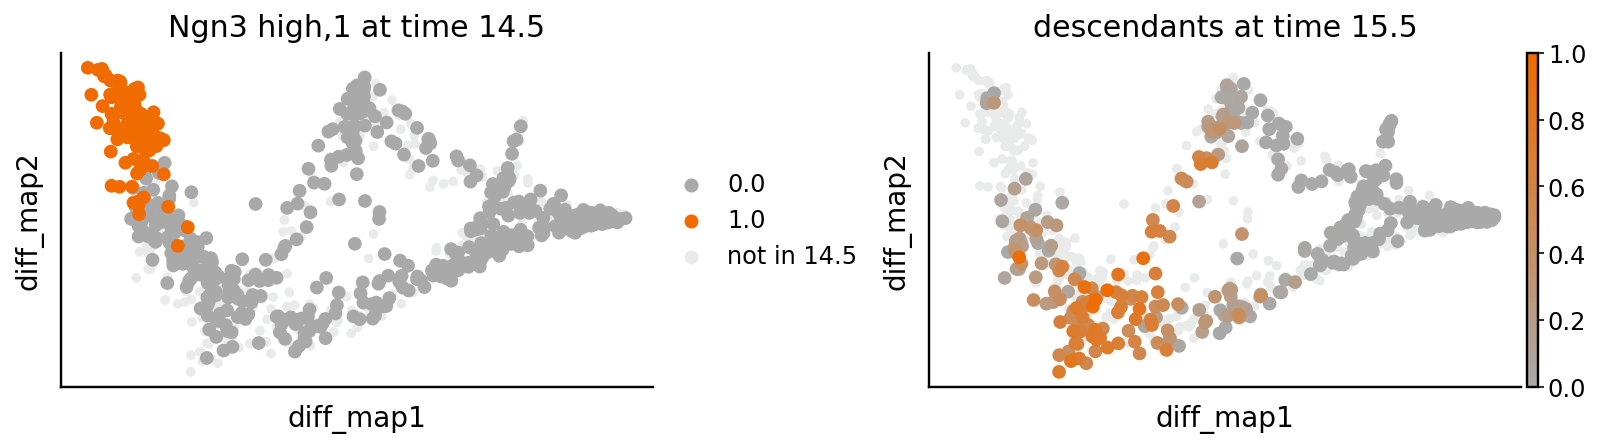

In [52]:
msc.plotting.push(tp0, uns_key="Ngn3_high_push", basis="diff_map", time_points=[14.5, 15.5], figsize=(11,3), save=os.path.join(output_dir, "Ngn3_high_push"))